In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import probplot

In [2]:
from google.colab import files
uploaded = files.upload()

Saving delivery_time.csv to delivery_time.csv


In [3]:
df = pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [6]:
df.shape

(21, 2)

In [7]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [8]:
df.isnull().values.any()

False

In [9]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

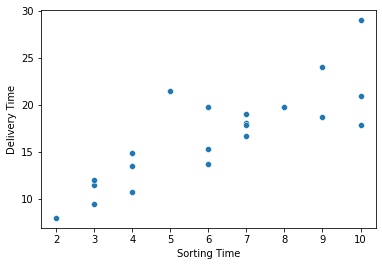

In [10]:
sns.scatterplot(x=df["Sorting Time"], y=df["Delivery Time"])

Text(0.5, 1.0, 'Histogram of Delivery Time')

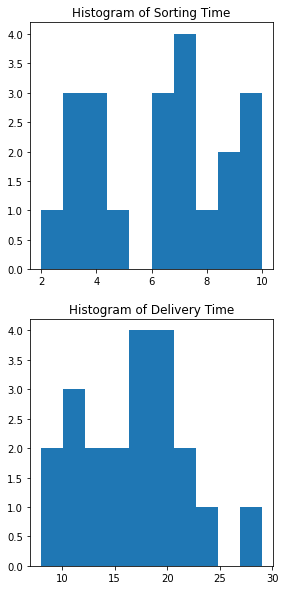

In [11]:
#Histogram
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.hist(df['Sorting Time'],density=False)
plt.title('Histogram of Sorting Time')
plt.subplot(2,4,5)
plt.hist(df['Delivery Time'], density=False)
plt.title("Histogram of Delivery Time")


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density distribution of Delivery Time')

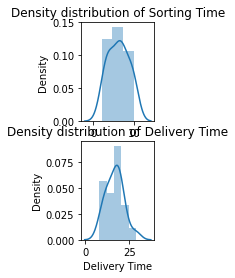

In [12]:
# Density plot
plt.subplot(2,4,2)
sns.distplot(df['Sorting Time'], kde=True)
plt.title("Density distribution of Sorting Time")
plt.subplot(2,4,6)
sns.distplot(df['Delivery Time'], kde=True)
plt.title("Density distribution of Delivery Time")

Text(0.5, 1.0, 'Boxlpot of Delivery Time')

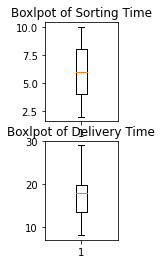

In [13]:
# boxplot or violin plot
plt.subplot(2,4,3)
plt.boxplot(df['Sorting Time'])
plt.title("Boxlpot of Sorting Time")
plt.subplot(2,4,7)
plt.boxplot(df['Delivery Time'])
plt.title("Boxlpot of Delivery Time")


Text(0.5, 1.0, 'Q-Q plot of Delivery Time')

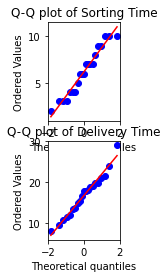

In [14]:
# Normal Q-Q plot
plt.subplot(2,4,4)
probplot(df['Sorting Time'], plot=plt)
plt.title("Q-Q plot of Sorting Time")
plt.subplot(2,4,8)
probplot(df['Delivery Time'], plot=plt)
plt.title("Q-Q plot of Delivery Time")

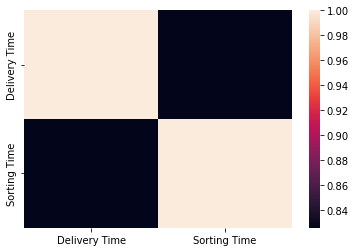

In [15]:
df.corr()#correlation
sns.heatmap(df.corr())

In [16]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [17]:
x=np.array(df["Sorting Time"])
print("Dimension :",x.ndim)
print("shape :",x.shape)

Dimension : 1
shape : (21,)


In [18]:
x=x.reshape(-1,1)
print("Dimension : ",x.ndim)
print("Shape : ",x.shape)

Dimension :  2
Shape :  (21, 1)


In [19]:
y=np.array(df["Delivery Time"]).reshape(-1,1)
print("Dimension : ",y.ndim)
print("Shape : ",y.shape)

Dimension :  2
Shape :  (21, 1)


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [21]:
 x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print("Length of X_train : ", len(x_train))
print("Length of Y_train : ", len(y_train))
print("Length of X_test : ", len(x_test))
print("Length of Y_test : ", len(y_test))

Length of X_train :  16
Length of Y_train :  16
Length of X_test :  5
Length of Y_test :  5


In [23]:
x_test

array([[ 6],
       [ 5],
       [10],
       [ 3],
       [ 9]])

In [24]:
y_test

array([[15.35],
       [21.5 ],
       [29.  ],
       [ 9.5 ],
       [24.  ]])

In [25]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [26]:
model.score(x_test,y_test)

0.4096020062444947

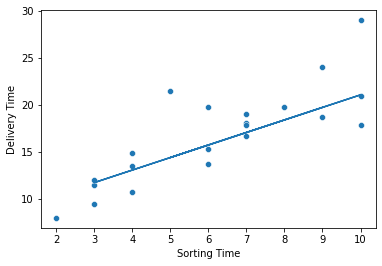

In [27]:
sns.scatterplot(x=df["Sorting Time"],y=df["Delivery Time"])
plt.plot(x_test,model.predict(x_test))
plt.show()

In [28]:
import statsmodels.formula.api as smf

In [29]:
linear_model = smf.ols("y~x", data=df).fit()

In [30]:
linear_model.params

Intercept    6.582734
x            1.649020
dtype: float64

In [31]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        09:44:37   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
x              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**EDA EXPLORATORY DATA ANALYSIS**

In [32]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [33]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [34]:
df["Delivery Time"].unique()
df["Sorting Time"].unique()

array([10,  4,  6,  9,  7,  3,  8,  2,  5])

**Visualisation**

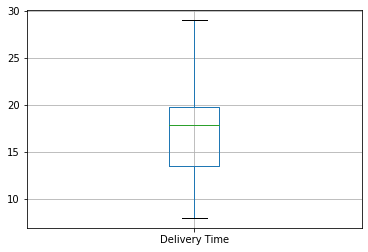

In [35]:
df.boxplot(column=['Delivery Time'],grid=True)

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <a list of 10 Patch objects>)

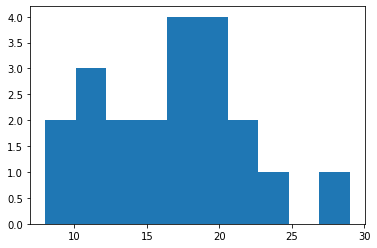

In [36]:
plt.hist(df['Delivery Time'])

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

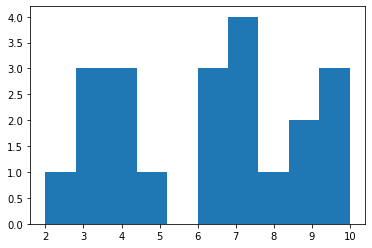

In [37]:
plt.hist(df['Sorting Time'])

In [38]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

**Transformation**

In [39]:
import statsmodels.api as sm

In [40]:
x_log = np.log(df['Sorting Time'])
y_log = np.log(df['Delivery Time'])

In [41]:
model = sm.OLS(y_log,x_log).fit()
prediction = model.predict(x_log)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              688.7
Date:                Tue, 15 Nov 2022   Prob (F-statistic):                    5.72e-17
Time:                        09:44:38   Log-Likelihood:                         -13.899
No. Observations:                  21   AIC:                                      29.80
Df Residuals:                      20   BIC:                                      30.84
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.5396      0.059     26.244      0.000       1.417       1.662
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.137
Skew:                           0.304   Prob(JB):                        0.566
Kurtosis:                       2.035   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
x_sqrt = np.sqrt(df['Sorting Time'])
y_sqrt = np.sqrt(df['Delivery Time'])
model = sm.OLS(y_sqrt, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Tue, 15 Nov 2022   Prob (F-statistic):                    2.10e-20
Time:                        09:44:39   Log-Likelihood:                         -13.658
No. Observations:                  21   AIC:                                      29.32
Df Residuals:                      20   BIC:                                      30.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.6364      0.042     39.267      0.000       1.549       1.723
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.231
Skew:                          -0.179   Prob(JB):                        0.891
Kurtosis:                       2.632   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
x_cbrt = np.cbrt(df['Sorting Time'])
y_cbrt = np.cbrt(df['Delivery Time'])
model = sm.OLS(y_cbrt, x_cbrt).fit()
predictions = model.predict(x_cbrt)

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              3370.
Date:                Tue, 15 Nov 2022   Prob (F-statistic):                    9.01e-24
Time:                        09:44:39   Log-Likelihood:                          4.4569
No. Observations:                  21   AIC:                                     -6.914
Df Residuals:                      20   BIC:                                     -5.869
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.3972      0.024     58.056      0.000       1.347       1.447
==============================================================================
Omnibus:                        0.117   Durbin-Watson:                   1.514
Prob(Omnibus):                  0.943   Jarque-Bera (JB):                0.326
Skew:                          -0.101   Prob(JB):                        0.850
Kurtosis:                       2.424   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
x_exp = np.exp2(df['Sorting Time'])
y_exp = np.exp(df['Delivery Time'])
model = sm.OLS(y_exp, x_exp).fit()
predictions = model.predict(x_exp)

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.277
Model:                            OLS   Adj. R-squared (uncentered):              0.241
Method:                 Least Squares   F-statistic:                              7.659
Date:                Tue, 15 Nov 2022   Prob (F-statistic):                      0.0119
Time:                        09:44:39   Log-Likelihood:                         -603.43
No. Observations:                  21   AIC:                                      1209.
Df Residuals:                      20   BIC:                                      1210.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time  1.059e+09   3.83e+08      2.767      0.012    2.61e+08    1.86e+09
==============================================================================
Omnibus:                       37.040   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.908
Skew:                           2.811   Prob(JB):                     5.01e-25
Kurtosis:                      12.813   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""